In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
#Q1

In [30]:
img = cv2.imread('Lab2_images/wagon.jpg')

In [32]:
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [33]:
surf = cv2.xfeatures2d.SURF_create(400)

In [34]:
kp,des = surf.detectAndCompute(gray_img,None)

In [35]:
len(kp)

5879

In [40]:
kp_img = cv2.drawKeypoints(img,kp,gray_img)

In [42]:
kp_img = cv2.cvtColor(kp_img,cv2.COLOR_BGR2RGB)

In [ ]:
cv2.imshow('image',kp_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [38]:
surf = cv2.xfeatures2d.SURF_create(400)

In [7]:
kp,des = surf.detectAndCompute(img,None)

In [8]:
len(kp)

5890

In [9]:
des

array([[-5.9752008e-03, -1.2241524e-03,  6.9554672e-03, ...,
        -3.6805554e-03,  3.9046193e-03,  4.5279432e-03],
       [ 8.6833872e-03, -6.6687330e-04,  1.3223123e-02, ...,
         1.0056461e-04,  3.5311652e-03,  1.2595025e-03],
       [ 1.6475350e-03, -2.9358929e-03,  1.8950038e-03, ...,
        -2.6603530e-03,  1.2591062e-03,  3.4106025e-03],
       ...,
       [ 1.5641169e-03,  5.4655824e-04,  4.0441072e-03, ...,
         8.2942919e-04,  1.6281776e-02,  6.1108996e-03],
       [ 1.1151475e-03, -3.5346537e-05,  2.7009491e-03, ...,
        -3.8542170e-03,  4.3477234e-03,  5.2222731e-03],
       [ 8.3241967e-04,  2.2866437e-03,  7.7449107e-03, ...,
        -5.9338761e-03,  1.7018968e-02,  6.2706918e-03]], dtype=float32)

In [10]:
print(surf.getHessianThreshold())

400.0


In [11]:
surf.setHessianThreshold(10000)

In [12]:
kp,des = surf.detectAndCompute(img,None)

In [13]:
des

array([[-5.9752008e-03, -1.2241524e-03,  6.9554672e-03, ...,
        -3.6805554e-03,  3.9046193e-03,  4.5279432e-03],
       [ 8.6833872e-03, -6.6687330e-04,  1.3223123e-02, ...,
         1.0056461e-04,  3.5311652e-03,  1.2595025e-03],
       [ 1.6475350e-03, -2.9358929e-03,  1.8950038e-03, ...,
        -2.6603530e-03,  1.2591062e-03,  3.4106025e-03],
       ...,
       [-5.4132175e-05,  5.0168444e-05,  2.3355205e-04, ...,
        -1.3564225e-02,  2.0915898e-03,  1.3580696e-02],
       [-8.5052924e-04, -5.8395474e-04,  1.3113956e-03, ...,
         2.4317487e-03,  1.1815840e-03,  4.3977741e-03],
       [-2.8034234e-03,  1.1396168e-04,  4.6388358e-03, ...,
         6.9374969e-04,  2.6285076e-03,  4.6529961e-03]], dtype=float32)

In [14]:
len(kp)

99

In [15]:
img2 = cv2.drawKeypoints(img,kp,None,(255,0,0),4)

In [16]:
k = 'kp = ' + str(kp)

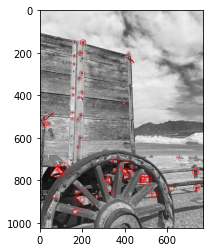

In [17]:
plt.imshow(img2)
#plt.title(k)
plt.show()

In [27]:
def p(img,n):
    surf = cv2.xfeatures2d.SURF_create(n)
    kp,des = surf.detectAndCompute(img,None)
    print('            keypoints = ',len(kp))
    img2 = cv2.drawKeypoints(img,kp,None,(255,0,0),4)
    plt.imshow(img2)
    plt.show()

1062


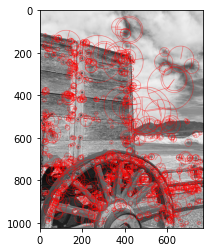

In [29]:
p(img,2400)

In [30]:
# Q2

In [35]:
src = np.float32([[0,512],[390,520],[390,0]])
des = np.float32([[50,475],[390,520],[420,50]])
at = cv2.getAffineTransform(src,des)
     #cv2.getAffineTransform(src,dst)
at

array([[ 8.72978304e-01, -5.76923077e-02,  7.95384615e+01],
       [ 9.68441815e-02,  9.03846154e-01,  1.22307692e+01]])

In [ ]:
rows,cols = img.shape
t_img = cv2.warpAffine(img,at,(cols,rows))


In [18]:
# Q3 a

In [158]:
img1 = cv2.imread('Lab2_images/wheel.png')
img2 = cv2.imread('Lab2_images/toy.png')

In [159]:
# surf = cv2.xfeatures2d.SURF_create(400)

In [160]:
def k_img(img,n):
    surf = cv2.xfeatures2d.SURF_create(n)
    gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    kp,ds = surf.detectAndCompute(gray_img,None)
    kp_img = cv2.drawKeypoints(img,kp,gray_img)
    kp_img = cv2.cvtColor(kp_img,cv2.COLOR_BGR2RGB)
    return kp,ds,kp_img

In [161]:
kp1,ds1,kp_img1 = k_img(img1,400)
kp2,ds2,kp_img2 = k_img(img2,400)


In [162]:
ds1.shape[0]

1896

In [163]:
len(ds1)

1896

In [164]:
len(ds2)

210

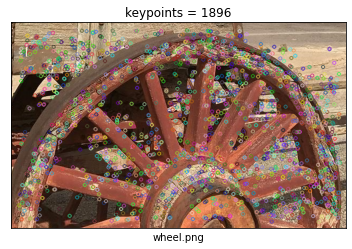

In [165]:
t1 = 'keypoints = ' + str(len(kp1))
l1 = 'wheel.png'
plt.imshow(kp_img1)
plt.title(t1)
plt.xlabel(l1)
plt.xticks([])
plt.yticks([])
#plt.title(k)
plt.show()

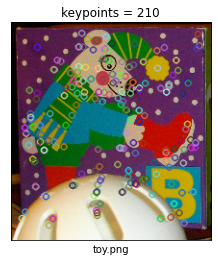

In [166]:
t2 = 'keypoints = ' + str(len(kp2))
l2 = 'toy.png'
plt.imshow(kp_img2)
plt.title(t2)
plt.xlabel(l2)
plt.xticks([])
plt.yticks([])
#plt.title(k)
plt.show()

In [167]:
# Q3 b

In [223]:
img0 = cv2.imread('Lab2_images/wagon.jpg')
kp0,ds0,kp_img0 = k_img(img0,400)


In [201]:
bf1 = cv2.BFMatcher()
matches1 = bf1.knnMatch(ds1,ds0,k = 2)
bf2 = cv2.BFMatcher()
matches2 = bf2.knnMatch(ds2,ds0,k = 2)

In [179]:
len(ds0)

5879

In [180]:
len(ds1)

1896

In [214]:
good1 = []
good2 = []

In [215]:

for m,n in matches1:
    if m.distance <  0.75*n.distance:
        if [m] not in good1:
            good1.append([m])

In [216]:
for m,n in matches2:
    #print(m)
    if m.distance < 0.75*n.distance:
        if [m] not in good2:
            good2.append([m])

In [225]:
img3 = cv2.drawMatchesKnn(kp_img1,kp1,kp_img0,kp0,good1,None,flags=2)

In [217]:
len(good1),len(good2)

(1868, 6)

In [143]:
a=[[1,2],[2]]
if [2] in a:
    print(1)

1


In [52]:
kp_img0.shape

(1024, 768, 3)

In [53]:
kp_img1.shape

(386, 629, 3)

In [82]:
matches1.distance

AttributeError: 'list' object has no attribute 'distance'

In [83]:
good = []
for m,n in matches1:
    if m.distance < 0.75*n.distance:
        good.append([m])

TypeError: cannot unpack non-iterable cv2.DMatch object

In [55]:
kp_img0[20:40,40:50,2]

array([[219, 219, 219, 219, 220, 220, 220, 221, 222, 222],
       [218, 218, 218, 219, 219, 219, 220, 220, 221, 222],
       [217, 217, 218, 218, 218, 219, 219, 219, 221, 221],
       [217, 217, 217, 218, 218, 218, 219, 219, 221, 221],
       [217, 217, 217, 218, 218, 219, 219, 220, 217, 218],
       [215, 216, 216, 216, 217, 217, 218, 218, 215, 216],
       [214, 214, 215, 215, 215, 215, 216, 216, 213, 214],
       [214, 214, 215, 215, 215, 215, 215, 215, 212, 213],
       [216, 216, 215, 215, 215, 215, 215, 215, 212, 213],
       [216, 216, 215, 215, 215, 215, 214, 214, 213, 214],
       [215, 214, 214, 214, 213, 213, 212, 212, 212, 213],
       [213, 213, 213, 212, 212, 211, 211, 210, 211, 212],
       [214, 214, 213, 212, 212, 211, 210, 210, 215, 215],
       [214, 214, 213, 212, 211, 211, 210, 210, 214, 215],
       [214, 213, 213, 212, 211, 210, 210, 210, 213, 214],
       [213, 213, 212, 212, 211, 210, 209, 209, 212, 213],
       [213, 213, 212, 211, 210, 210, 209, 209, 210, 211

In [60]:
type(matches1[0])

cv2.DMatch

In [62]:
len(ds0),len(ds1)

(5879, 1896)

In [68]:
sum(ds1[1] == ds1[1])

64

In [64]:
ds1[0]

array([ 1.65235950e-03, -2.93869409e-03,  1.89819362e-03,  2.95391795e-03,
       -8.50963173e-04, -8.51648208e-03,  5.29266568e-03,  1.34241395e-02,
        2.96056329e-04, -8.51931423e-03,  2.68396130e-03,  9.22747422e-03,
        2.57738488e-04, -1.49472558e-03,  5.08588040e-04,  1.57799770e-03,
        2.69274856e-03, -7.35146366e-03,  3.00071528e-03,  8.60197283e-03,
        2.51936525e-01,  9.06879231e-02,  2.54691571e-01,  1.88846424e-01,
       -9.07439888e-02,  3.36462796e-01,  1.01722561e-01,  3.51179898e-01,
       -8.73459224e-03,  4.18468611e-03,  9.23916698e-03,  9.29984637e-03,
        6.09367635e-05,  4.62918309e-03,  1.44662615e-03,  6.59514125e-03,
        3.32485318e-01, -1.01140313e-01,  4.00286764e-01,  1.73619226e-01,
       -1.04743600e-01, -2.71097332e-01,  1.77210227e-01,  3.75499308e-01,
       -1.68301389e-02,  7.46647175e-03,  2.94044781e-02,  3.19221318e-02,
       -2.16294589e-04, -5.30439371e-04,  5.98860381e-04,  1.31998269e-03,
        1.31684828e-05,  

In [81]:
a=0 
for i in range(len(ds1)):
    for j in range(len(ds0)):
        if sum(ds1[i] == ds0[j]) == 64:
            a+=1
            break
a

0

In [57]:
for i,j in ematches1:
    print(i)
    print(j)

TypeError: cannot unpack non-iterable cv2.DMatch object

In [44]:
img3 = cv2.drawMatches(kp_img1,kp1,kp_img0,kp0,matches1[:40],kp_img1,flags = 2)

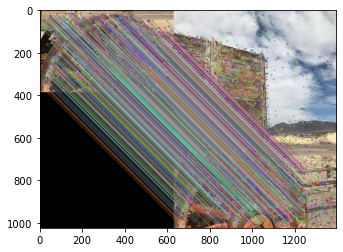

In [226]:
plt.imshow(img3)
plt.show()


In [31]:
len(ds1)

1896

In [32]:
matches2 = bf.match(ds0,ds2)

In [33]:
len(matches2)

5879